<h1 style='text-align:center;border-radius:20px ;border:3px solid #c54E58 ;color : white;  padding: 15px; font-size: 45pt; background-color:green'>MOVIE RATING PREDICTION</h1>

<div style="border-radius:20px ;border:3px solid #c54E58 ;color : Blue;  padding: 15px; font-size: 14pt; background-color: ; text-align:left">
    
This project focuses on predicting movie ratings based on various factors such as genre, director, and actors. The goal is to develop a machine learning model that can accurately estimate how a movie is rated by users or critics. By analyzing historical movie data, this project aims to uncover key features that influence movie ratings and use these insights to predict future ratings.

The core of the project involves using Python and machine learning techniques to build a predictive model. The dataset includes features such as the movie's year, duration, genre, director, and actors, all of which play a role in determining the movie's rating. The objective is to understand how these features impact the overall rating and apply regression algorithms to develop a model that can forecast ratings with high accuracy.

In addition to model building, the project involves comprehensive data preprocessing, feature engineering, and exploratory data analysis (EDA) to explore the relationships between different variables and their influence on ratings. Visualizations and statistical analysis are used to uncover patterns in the data, which helps in selecting the most relevant features for the model.

The ultimate goal of this project is to provide a tool that can predict movie ratings based on historical data, enabling stakeholders, such as film studios and content creators, to make data-driven decisions about movie production, marketing strategies, and audience targeting. By leveraging machine learning algorithms, the model aims to achieve reliable predictions, improving the understanding of factors that shape movie ratings.

With the ability to predict ratings based on key features, this project can offer valuable insights into the factors that influence movie success and provide guidance for future movie-related decision-making.
</div>


<div style="border-radius:20px ;border:3px solid gray ;color : blue;  padding: 15px; background-color: rgba(135, 206, 235, 0.4); text-align:left">
<a id="met"></a>
<h2> Methodology for Analyzing Features</h2>

The methodology for analyzing features in this movie rating prediction project follows a structured approach to explore the relationships between various factors and movie ratings. The objective is to identify key features that influence ratings and use this understanding to build an accurate predictive model.

* **Conduct an Overview of Data:**
    - Examine the dataset for missing values, duplicates, and other data quality issues.
    - Assess the distribution of key features, such as movie ratings, genre, director, and actors, and identify potential outliers.
    - Summarize the central tendency and variability of numerical variables like ratings, votes, and duration.
    - Cleanse data by handling missing values in columns like `Year`, `Duration`, `Votes`, and `Rating` by using appropriate imputation techniques (e.g., filling with median/mean).

* **Categorize Features:**
    - Categorize features into relevant groups such as:
        - **Numerical Features:** Year, Duration, Votes, Rating
        - **Categorical Features:** Genre, Director, Actor 1, Actor 2, Actor 3
    - One-hot encode categorical variables like Genre and Director to make them suitable for model input.

* **Feature Engineering:**
    - Create new features where necessary, such as a `Decade` column, to capture the temporal effects on movie ratings.
    - Split genres into separate binary features to capture the influence of multiple genres on movie ratings.

* **Formulate Hypotheses:**
    - Hypothesize that factors like genre, director, and cast members have significant relationships with movie ratings.
    - Test the null hypothesis (H0) that no significant relationships exist between these features and the ratings.

* **Statistical Testing:**
    - Use correlation analysis to evaluate relationships between numerical variables (e.g., `Duration`, `Votes`, and `Rating`).
    - Analyze categorical features through group-based statistics (e.g., calculating average ratings per genre or director).

* **Visual Analysis:**
    - Leverage visual tools like bar charts, scatter plots, and box plots to visualize the relationship between features and ratings.
    - Create a correlation heatmap to understand how numerical features, such as ratings, votes, and duration, are related to each other.
    - Use pair plots to examine the interactions between key numerical features and their influence on movie ratings.

* **Incorporate Observations:**
    - Based on statistical tests and visual analysis, incorporate observations regarding the impact of genres (e.g., Drama, Comedy) and influential directors/actors on movie ratings.
    - Observe which features have the most significant influence on predictions and consider them for inclusion in the model training process.

</div>


# <div style="padding:20px;color:white;margin:0;font-size:35px;text-align:center;display:fill;border-radius:10px;background-color:#c54E58;overflow:hidden; font-family: 'Lucida Console'"><b> DATA OVERVIEW </b></div>
<a id="data"></a>

In [35]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import optuna
import shap

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler,  OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

plt.style.use("ggplot")

import warnings
warnings.filterwarnings("ignore")

In [2]:

df = pd.read_csv("IMDb Movies India.csv", encoding='ISO-8859-1')
df.head()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [3]:
# Find info about the columns
print(df.shape)
print("-"*60)
print(df.isna().sum())
print("-"*60)
print(df.duplicated().sum())
print("-"*60)
df.info()

(15509, 10)
------------------------------------------------------------
Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64
------------------------------------------------------------
6
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage:

In [4]:
df.nunique()

Name        13838
Year          102
Duration      182
Genre         485
Rating         84
Votes        2034
Director     5938
Actor 1      4718
Actor 2      4891
Actor 3      4820
dtype: int64

In [5]:
# Clean year column by removing parentheses
df['Year'] = df['Year'].str.replace('(', '').str.replace(')', '')  # Clean the 'Year' column

# Convert 'Year' to numeric, invalid parsing will result in NaN
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Fill NaN values with the median of the 'Year' column
median_year = df['Year'].median()  # Calculate the median of 'Year'
df['Year'].fillna(median_year, inplace=True)  # Fill NaN with the median value

# Convert to int after handling NaN values
df['Year'] = df['Year'].astype(int)


print(df['Year'].head())


0    1991
1    2019
2    2021
3    2019
4    2010
Name: Year, dtype: int32


In [6]:
df['Duration'] = df['Duration'].str.split(' ',expand=True)[0].astype(float)

# Fill NaN values with the median of the 'Year' column
mean_year = df['Duration'].mean()  
df['Duration'].fillna(mean_year, inplace=True) 

# Convert to int after handling NaN values
df['Duration'] = df['Duration'].astype(int)

In [7]:
# Clean the 'Votes' column by removing commas
df['Votes'] = df['Votes'].str.replace(',', '')

# Convert to numeric, coercing errors to NaN
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')

# Fill NaN values with the median of the 'Votes' column
mean_votes = df['Votes'].mean()  
df['Votes'].fillna(mean_votes, inplace=True)  

# Convert to int after handling NaN values
df['Votes'] = df['Votes'].astype(int)

# Check the results
print(df['Votes'].head())


0    1938
1       8
2    1938
3      35
4    1938
Name: Votes, dtype: int32


In [8]:
# Convert to numeric, coercing errors to NaN
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Fill NaN values with the median of the 'Votes' column
mean_votes = df['Rating'].mean()  
df['Rating'].fillna(mean_votes, inplace=True)  

# Convert to int after handling NaN values
df['Rating'] = df['Rating'].astype(int)

# Check the results
print(df['Rating'].head())

0    5
1    7
2    5
3    4
4    5
Name: Rating, dtype: int32


In [9]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,1991,128,Drama,5,1938,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021,90,"Drama, Musical",5,1938,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019,110,"Comedy, Romance",4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010,105,Drama,5,1938,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,1988,128,Action,4,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,1999,129,"Action, Drama",4,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,2005,128,Action,5,1938,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,1988,128,Action,5,1938,NaN,NaN,NaN,NaN


In [10]:
print(df.isna().sum())

Name           0
Year           0
Duration       0
Genre       1877
Rating         0
Votes          0
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64


In [11]:
print(df['Genre'].head(30))

0                         Drama
1                         Drama
2                Drama, Musical
3               Comedy, Romance
4                         Drama
5        Comedy, Drama, Musical
6           Drama, Romance, War
7                   Documentary
8     Horror, Mystery, Thriller
9       Action, Crime, Thriller
10                        Drama
11                       Horror
12    Horror, Romance, Thriller
13       Comedy, Drama, Romance
14                     Thriller
15                Comedy, Drama
16                          NaN
17       Comedy, Drama, Fantasy
18       Comedy, Drama, Romance
19                          NaN
20        Comedy, Drama, Family
21        Crime, Drama, Mystery
22             Horror, Thriller
23                    Biography
24                  Documentary
25               Comedy, Horror
26                       Action
27                        Drama
28       Drama, Horror, Mystery
29                       Comedy
Name: Genre, dtype: object


In [12]:
# Step 1: Remove rows with NaN values in the 'Genre' column
df = df.dropna(subset=['Genre'])

# Step 2: Split the genre string into a list of genres
df['Genre'] = df['Genre'].str.split(', ')

# Step 3 (Optional): One-hot encode the genre column if needed
# This will create a separate column for each genre, with binary values (0 or 1)
genre_dummies = df['Genre'].str.join('|').str.get_dummies()

# Concatenate the original DataFrame with the new genre dummy columns
df = pd.concat([df, genre_dummies], axis=1)



In [13]:
# Drop the original 'Genre' column
df = df.drop(columns=['Genre', 'Name'])

df.head()


,Year,Duration,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Action,Adventure,...,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,1991,128,5,1938,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2019,109,7,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2021,90,5,1938,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2019,110,4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2010,105,5,1938,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13632 entries, 0 to 15508
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Year         13632 non-null  int32 
 1   Duration     13632 non-null  int32 
 2   Rating       13632 non-null  int32 
 3   Votes        13632 non-null  int32 
 4   Director     13131 non-null  object
 5   Actor 1      12407 non-null  object
 6   Actor 2      11928 non-null  object
 7   Actor 3      11368 non-null  object
 8   Action       13632 non-null  int64 
 9   Adventure    13632 non-null  int64 
 10  Animation    13632 non-null  int64 
 11  Biography    13632 non-null  int64 
 12  Comedy       13632 non-null  int64 
 13  Crime        13632 non-null  int64 
 14  Documentary  13632 non-null  int64 
 15  Drama        13632 non-null  int64 
 16  Family       13632 non-null  int64 
 17  Fantasy      13632 non-null  int64 
 18  History      13632 non-null  int64 
 19  Horror       13632 non-null  i

In [15]:
df.dropna(subset=['Director', 'Actor 1', 'Actor 2', 'Actor 3'], inplace=True)
df.shape

(11368, 32)

In [16]:
df.isna().sum()

Year           0
Duration       0
Rating         0
Votes          0
Director       0
Actor 1        0
Actor 2        0
Actor 3        0
Action         0
Adventure      0
Animation      0
Biography      0
Comedy         0
Crime          0
Documentary    0
Drama          0
Family         0
Fantasy        0
History        0
Horror         0
Music          0
Musical        0
Mystery        0
News           0
Reality-TV     0
Romance        0
Sci-Fi         0
Short          0
Sport          0
Thriller       0
War            0
Western        0
dtype: int64

In [17]:
df

,Year,Duration,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Action,Adventure,...,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,1991,128,5,1938,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2019,109,7,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2021,90,5,1938,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2019,110,4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2010,105,5,1938,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15502,1979,128,5,1938,Dinesh-Ramanesh,Ramesh Puri,Jalal Agha,Valerie Agha,1,0,...,0,0,0,0,0,0,0,0,0,0
15503,1989,125,5,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth,1,0,...,0,0,0,0,0,0,0,0,0,0
15504,1988,128,4,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand,1,0,...,0,0,0,0,0,0,0,0,0,0
15505,1999,129,4,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,1,0,...,0,0,0,0,0,0,0,0,0,0


# <div style="padding:20px;color:white;margin:0;font-size:35px;text-align:center;display:fill;border-radius:10px;background-color:#c54E58;overflow:hidden; font-family: 'Lucida Console'"><b> STATISTICAL ANALYSIS</b></div>
<a id="analysis"></a>

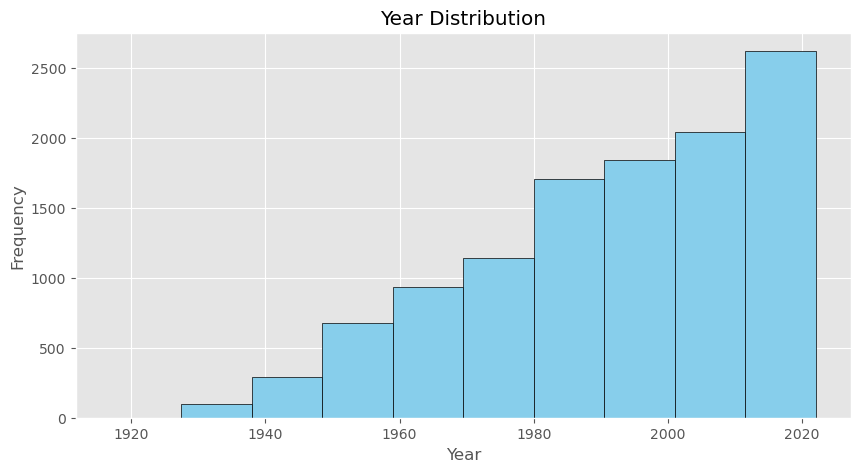

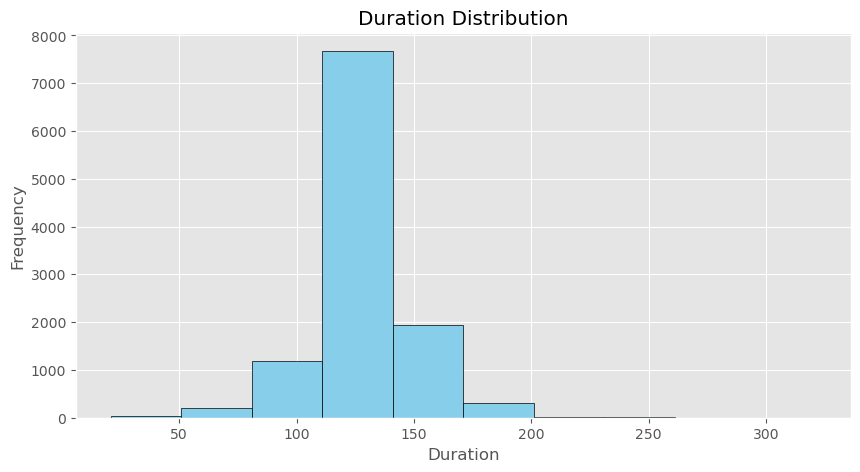

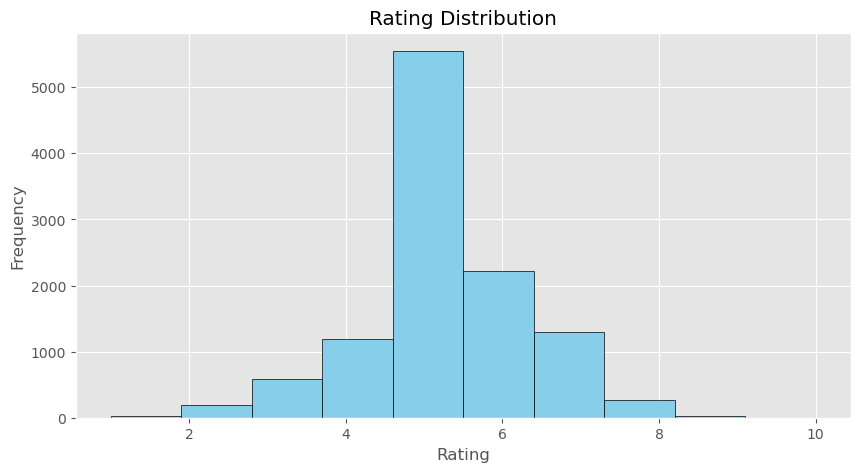

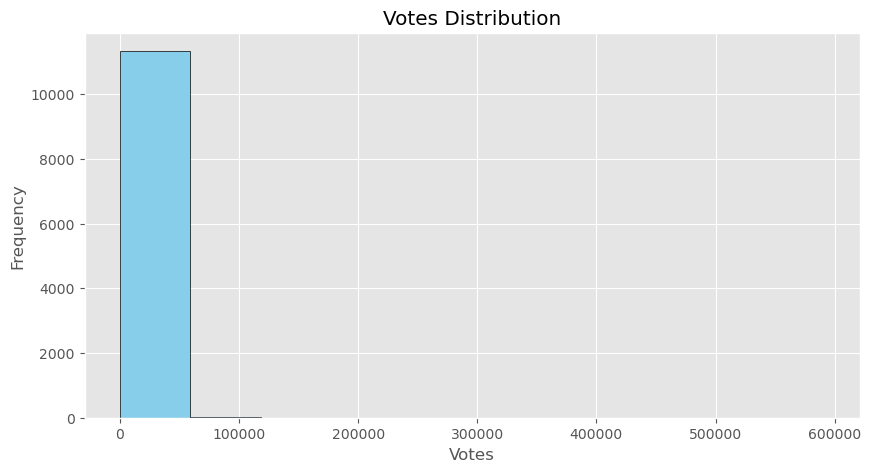

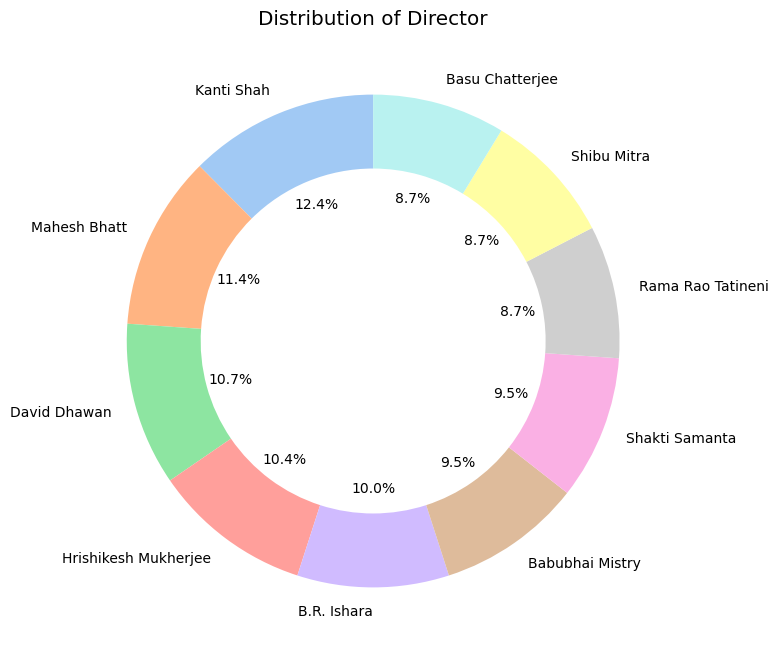

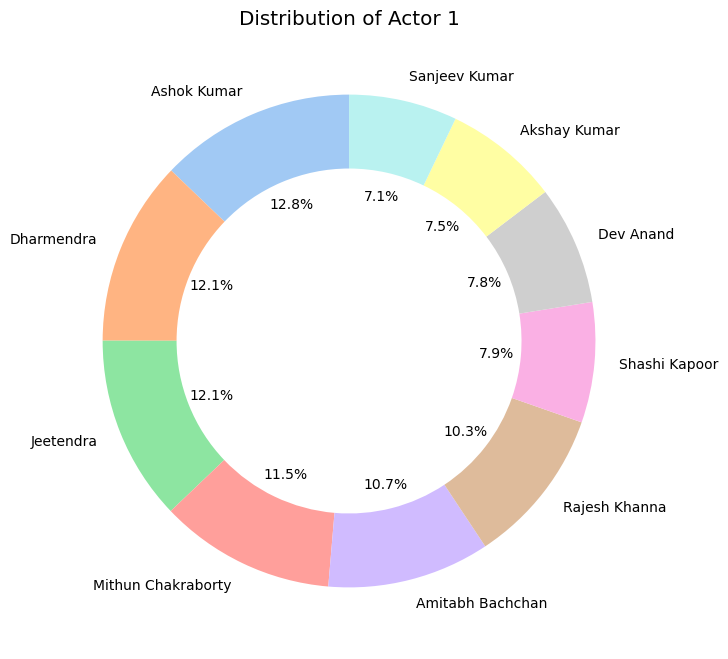

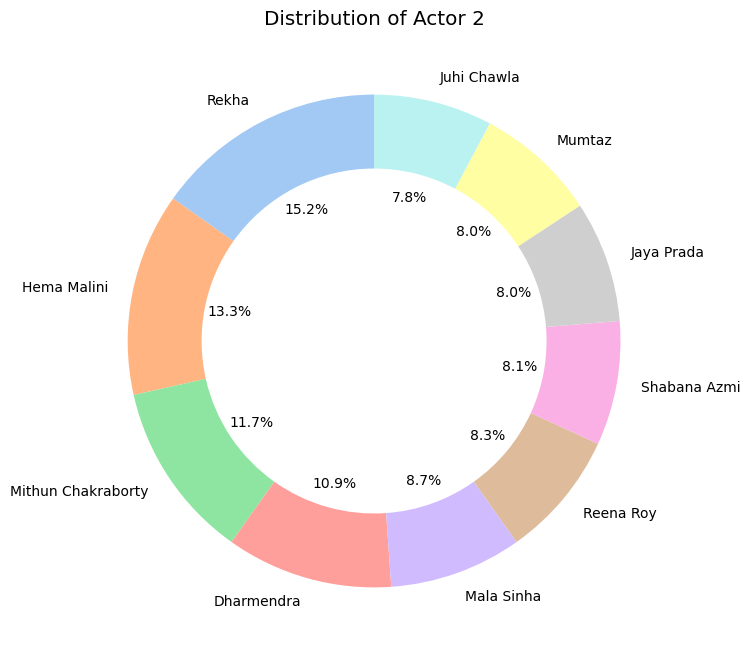

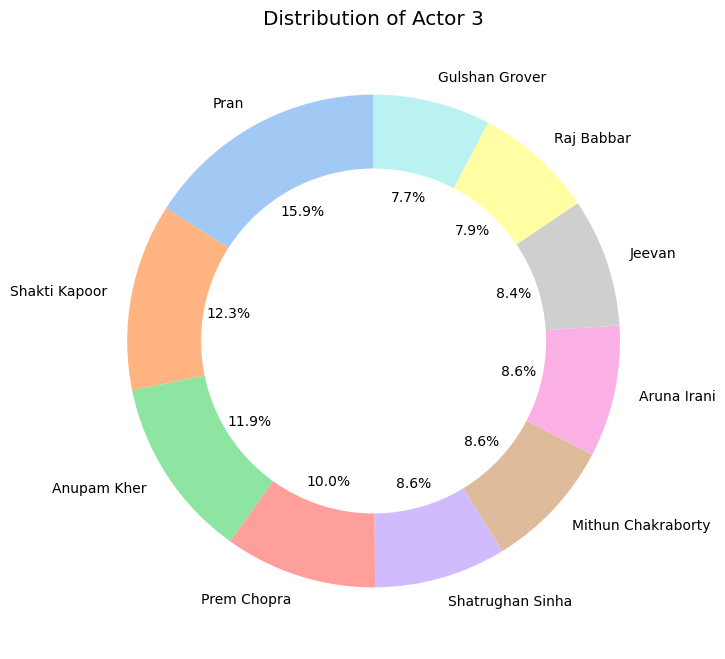

In [18]:
# Function to plot pie chart for categorical data
def plot_pie_chart(column):
    plt.figure(figsize=(8, 8))
    df[column].value_counts().head(10).plot.pie(
        autopct='%1.1f%%', 
        startangle=90, 
        colors=sns.color_palette('pastel'), 
        wedgeprops=dict(width=0.3)
    )
    plt.title(f'Distribution of {column}')
    plt.ylabel('')
    plt.show()

# Function to plot histogram for numerical data
def plot_hist_chart(column):
    plt.figure(figsize=(10, 5))
    df[column].hist(color='skyblue', edgecolor='black')
    plt.title(f'{column} Distribution')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


selected_columns = ['Year', 'Duration', 'Rating', 'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']

# Plot for each selected column
for col in selected_columns:
    if df[col].dtype == 'object':
        plot_pie_chart(col)
    else:
        plot_hist_chart(col)


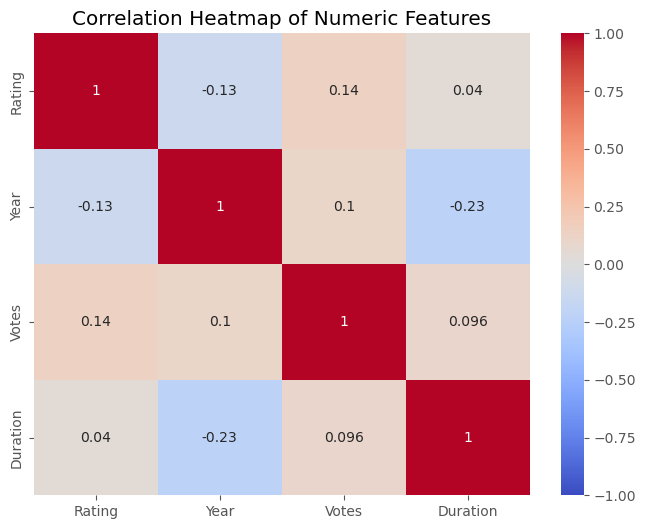

In [19]:
# Correlation heatmap for numeric features
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Rating', 'Year', 'Votes', 'Duration']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


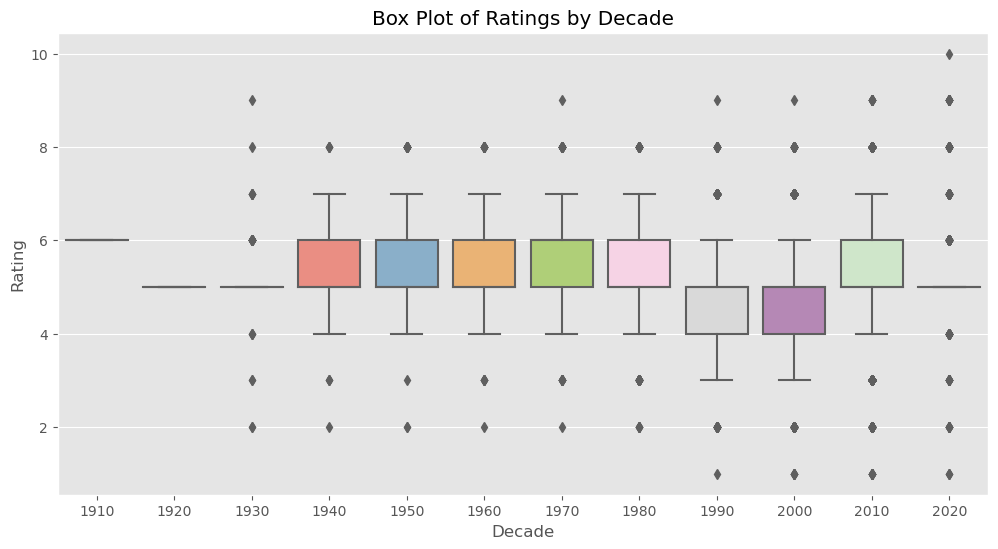

In [20]:
# Create a 'Decade' column
df['Decade'] = (df['Year'] // 10) * 10

plt.figure(figsize=(12, 6))
sns.boxplot(x='Decade', y='Rating', data=df, palette='Set3')
plt.title('Box Plot of Ratings by Decade')
plt.xlabel('Decade')
plt.ylabel('Rating')
plt.show()


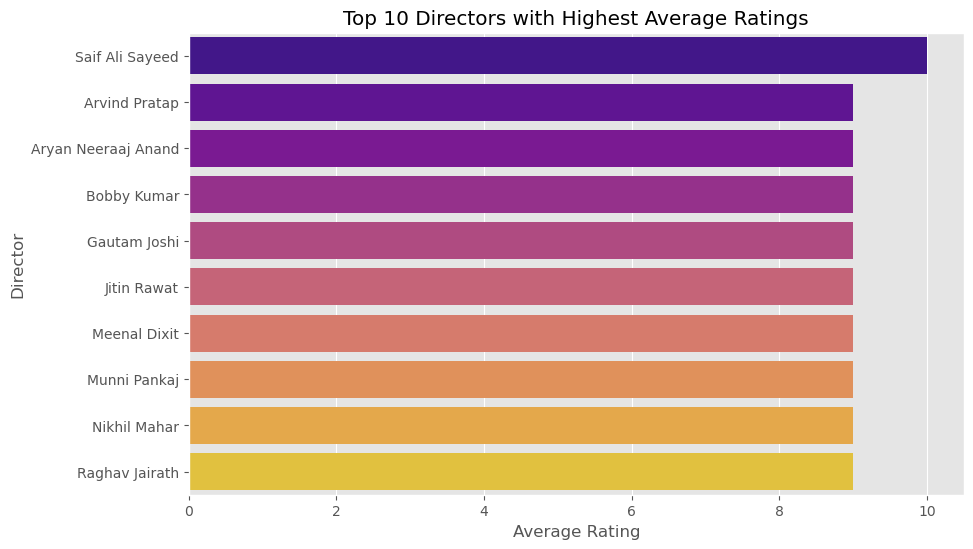

In [21]:
# Calculate average rating for each director
top_directors = df.groupby('Director')['Rating'].mean().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette="plasma")
plt.title('Top 10 Directors with Highest Average Ratings')
plt.xlabel('Average Rating')
plt.show()


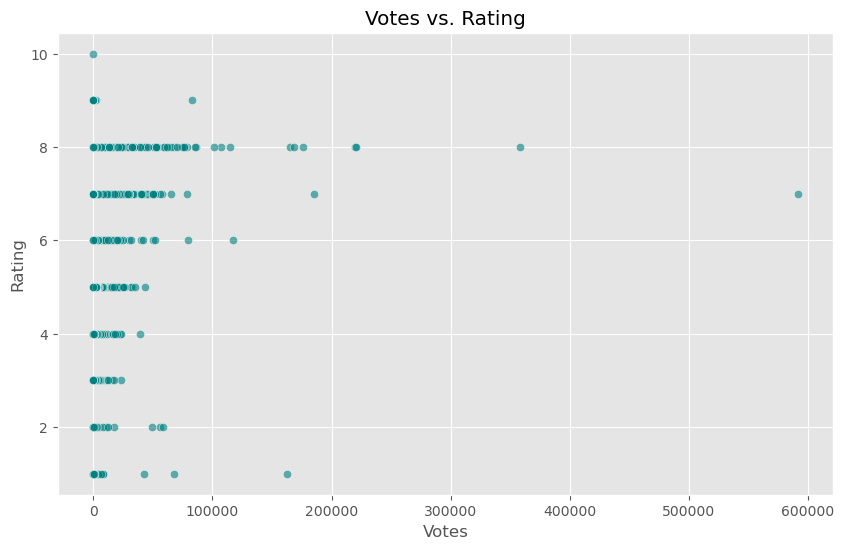

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Votes', y='Rating', data=df, alpha=0.6, color='teal')
plt.title('Votes vs. Rating')
plt.xlabel('Votes')
plt.ylabel('Rating')
plt.show()


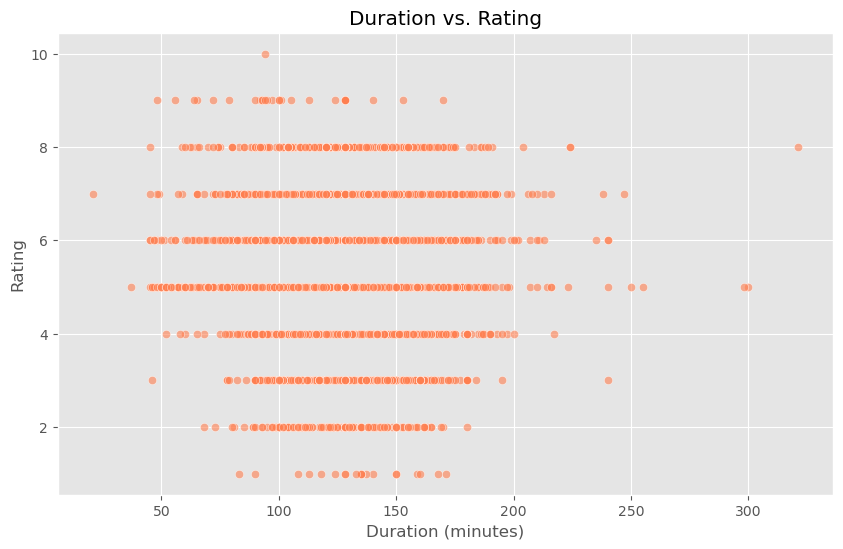

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration', y='Rating', data=df, alpha=0.6, color='coral')
plt.title('Duration vs. Rating')
plt.xlabel('Duration (minutes)')
plt.ylabel('Rating')
plt.show()


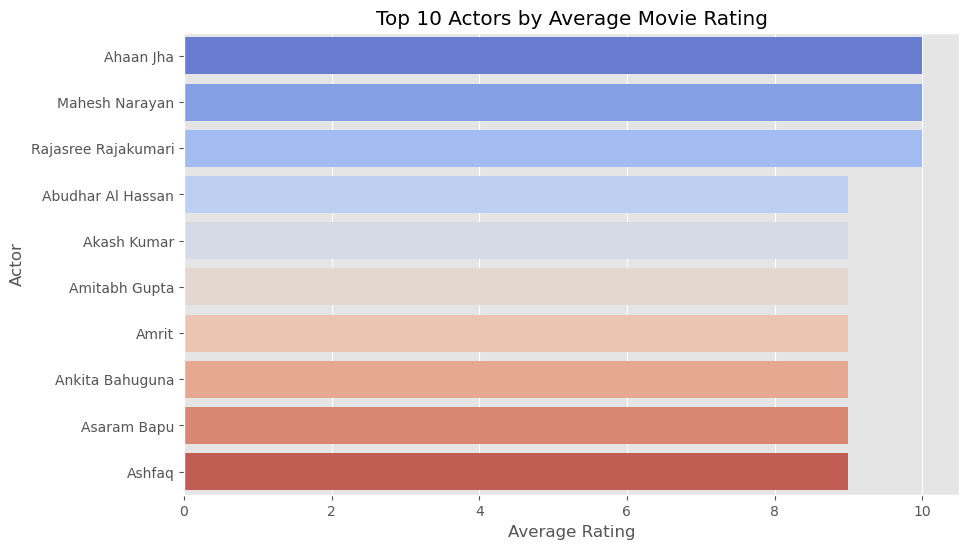

In [24]:
# Melt the actor columns to have a single column for all actors
actor_ratings = pd.melt(df, id_vars=['Rating'], value_vars=['Actor 1', 'Actor 2', 'Actor 3'],
                        var_name='Actor_Type', value_name='Actor')



# Calculate the average rating for each actor and get the top 10
top_actors = actor_ratings.groupby('Actor')['Rating'].mean().nlargest(10)

# Plot the top actors by average rating
plt.figure(figsize=(10, 6))
sns.barplot(x=top_actors.values, y=top_actors.index, palette="coolwarm")
plt.title('Top 10 Actors by Average Movie Rating')
plt.xlabel('Average Rating')
plt.ylabel('Actor')
plt.show()


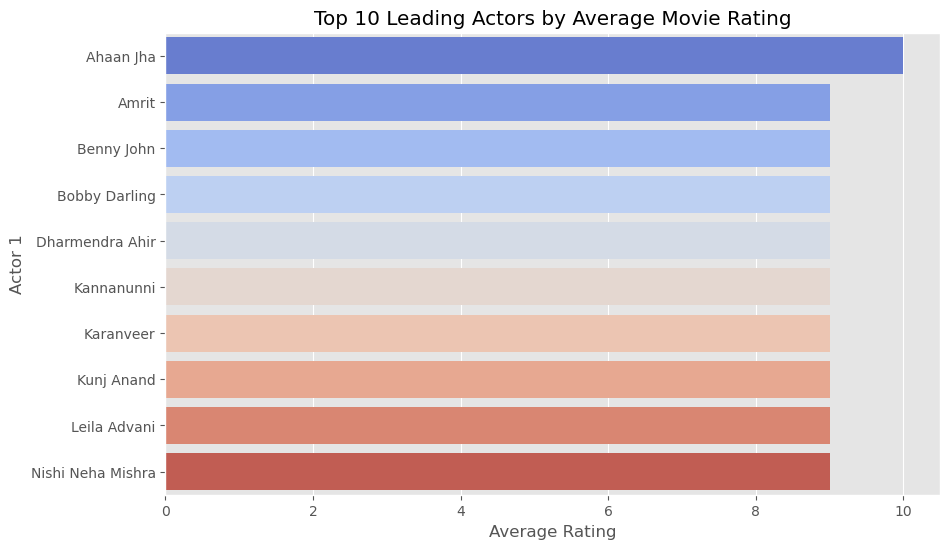

In [25]:
top_actors = df.groupby('Actor 1')['Rating'].mean().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_actors.values, y=top_actors.index, palette="coolwarm")
plt.title('Top 10 Leading Actors by Average Movie Rating')
plt.xlabel('Average Rating')
plt.show()


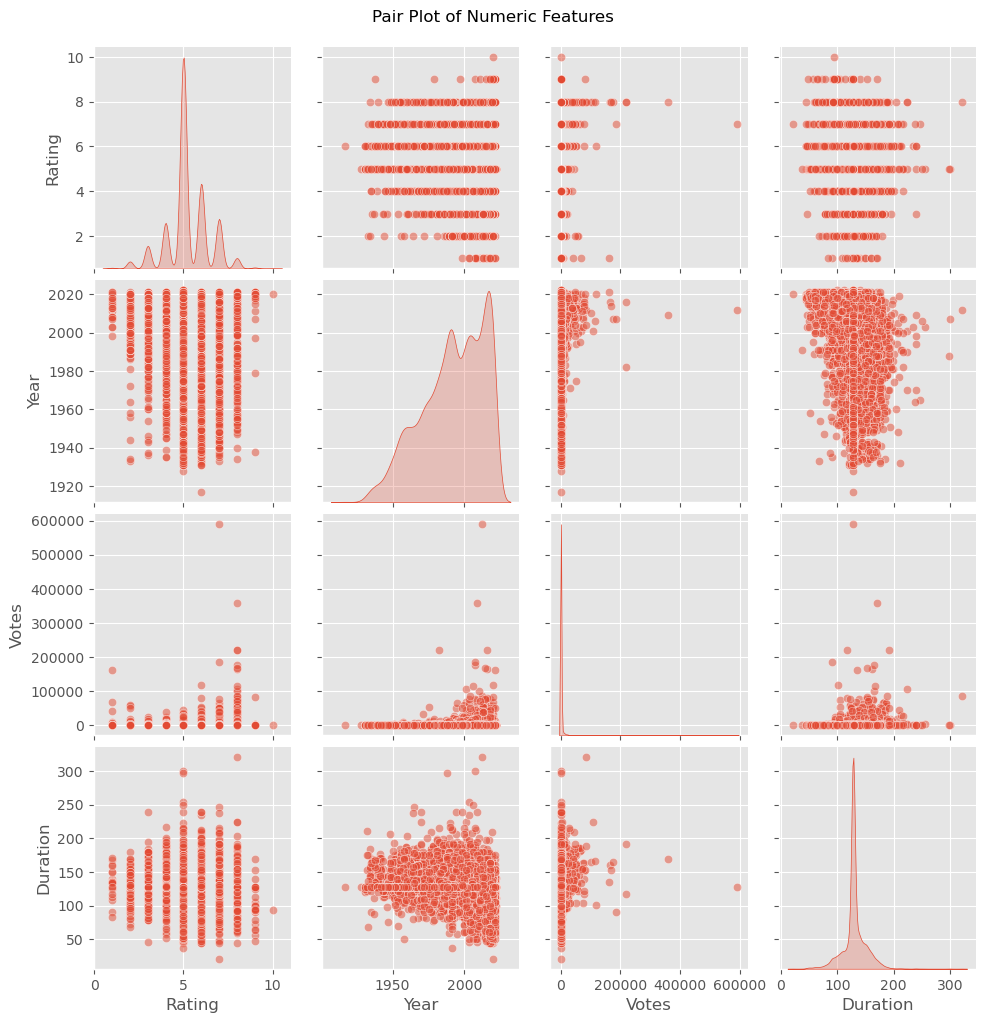

In [26]:
sns.pairplot(df[['Rating', 'Year', 'Votes', 'Duration']], diag_kind='kde', plot_kws={'alpha':0.5})
plt.suptitle('Pair Plot of Numeric Features', y=1.02)
plt.show()


# <div style="padding:20px;color:white;margin:0;font-size:35px;text-align:center;display:fill;border-radius:10px;background-color:#c54E58;overflow:hidden; font-family: 'Lucida Console'"><b> FEATURE ENGINEERING & SELECTION</b></div>
<a id="engine"></a>

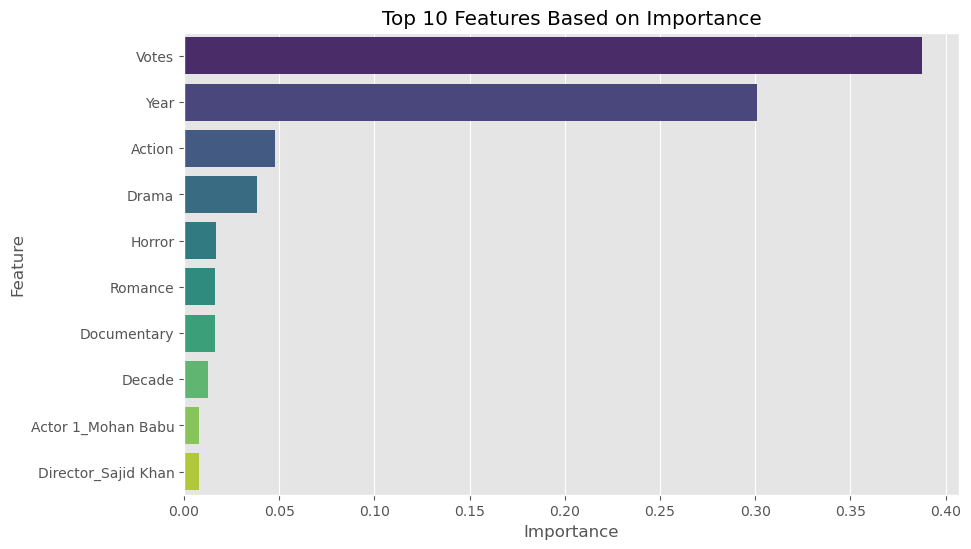

In [46]:
# Plot the feature importances as a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10), palette='viridis')
plt.title('Top 10 Features Based on Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


# <div style="padding:20px;color:white;margin:0;font-size:35px;text-align:center;display:fill;border-radius:10px;background-color:#c54E58;overflow:hidden; font-family: 'Lucida Console'"><b>MODEL TRAINING AND EVALUATION</b></div>
<a id="model"></a>

In [27]:
target = 'Rating'
X = df.drop(columns=[target,'Duration'])
y = df[target]

In [28]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# <div style="padding:15px;color:white;margin:0;font-size:25px;text-align:center;display:fill;border-radius:5px;background-color:red;overflow:hidden; font-family: 'Lucida Console'"><b> 1. RANDOM FOREST REGRESSOR</b></div>
<a id="rf"></a>

In [29]:
# Preprocessing the data
# List of numerical and categorical columns
numerical_features = ['Year', 'Votes', 'Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 
                      'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 
                      'Musical', 'Mystery', 'News', 'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 
                      'Thriller', 'War', 'Western', 'Decade']
categorical_features = ['Director', 'Actor 1', 'Actor 2', 'Actor 3']

# Define the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_features),       # Scaling numerical features
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)  # Encoding categorical features
    ])

# Create a pipeline that preprocesses data and then applies the regression model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))  # Replace with regression model of choice
])

In [30]:
# Training the model
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 0.9038316997233512


# <div style="padding:15px;color:white;margin:0;font-size:25px;text-align:center;display:fill;border-radius:5px;background-color:red;overflow:hidden; font-family: 'Lucida Console'"><b>2.  GRADIENT BOOSTING REGRESSOR</b></div>
<a id="gb"></a>

In [36]:
# Create a pipeline that includes preprocessing and the Gradient Boosting Regressor
model2 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42))
])

In [37]:
# Training the model
model2.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model2.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f"Root Mean Squared Error (RMSE): {rmse}")


Root Mean Squared Error (RMSE): 0.9467882016420858



<div style="border-radius:30px; border:Indigo solid; color:Indigo; padding: 15px; background-color: rgba(135, 206, 235, 0.75); text-align:left">
    
> ## Movie Rating Prediction Recap:
>> * **Key Features:** The model takes into account important features such as Genre, Director, and Actors to predict the Rating of a movie.
>> * **Data Processing:** The data underwent extensive preprocessing, including handling missing values, converting categorical features into numerical formats, and feature engineering to capture genre-related information.
>> * **Models Used:** We applied (`Random Forest Regressor`) and (`Gradient Boosting Regressor`) to predict the ratings.
>> * **Model Performance:** Both models were evaluated using Root Mean Squared Error (RMSE), providing insights into the accuracy of each model.
>> * **Evaluation Results:** The Gradient Boosting Regressor performed well, achieving a relatively low RMSE value (`0.94`). It showed a good balance between accuracy and interpretability for predicting movie ratings.
>> * **Feature Importance:** Key features contributing to the model's predictions include the Director and Genre, with genres like Drama and Comedy having a significant influence on the ratings. 
    
> ## Conclusion:
(`Random Forest Regressor`) was the best model with the best predictive performance with lowest RMSE (`0.90`)
</div>